# 99 Diagrams and Images for Documentation 

In [1]:
import os
import sys
print(sys.version)
sys.path.extend(['./COMMON_UTILS/'])

3.9.10 (main, Aug 11 2022, 16:34:26) 
[GCC 12.1.1 20220730]


In [41]:
import pickle as pkl

import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

from tqdm.auto import tqdm
from IPython.display import display, Audio

In [3]:
from utils import plot_audio, play

In [4]:
plt.rcParams["figure.figsize"] = (15, 5)

### Demucs Waveforms

In [5]:
src = "neil_young"
y, sr = librosa.load(f"PROCESSED/{src}/source.wav", sr=None)

In [6]:
play(y, sr)

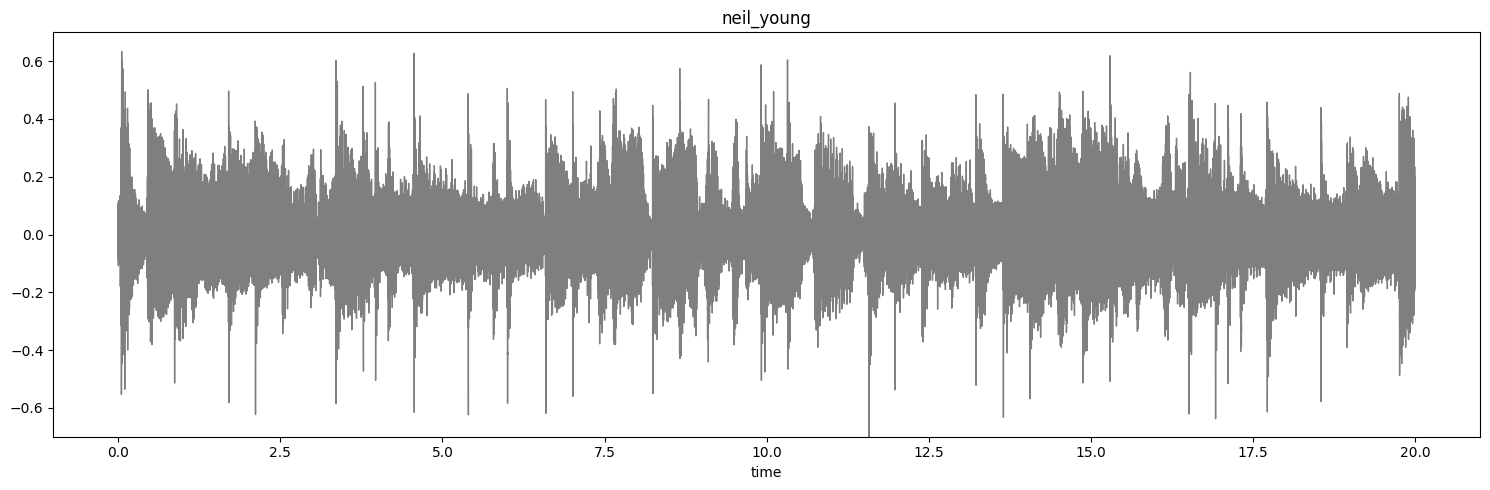

In [7]:
ax = plot_audio(y, sr, lw=1, c='black', alpha=0.5)
ax.set_title(src)
ax.set_xlabel("time")
ax.set_ylim(-0.7, 0.7)
plt.tight_layout()

plt.savefig("DOCUMENTAION/DIAGRAMS/demucs_0_full.png", facecolor="white")
plt.show()

In [8]:
y_drums, _ = librosa.load(f"PROCESSED/{src}/DRUMS/drums.wav", sr=sr)
y_bass, _ = librosa.load(f"PROCESSED/{src}/BASS/bass.wav", sr=sr)
y_vocals, _ = librosa.load(f"PROCESSED/{src}/VOCALS/vocals.wav", sr=sr)
y_other, _ = librosa.load(f"PROCESSED/{src}/OTHER/other.wav", sr=sr)

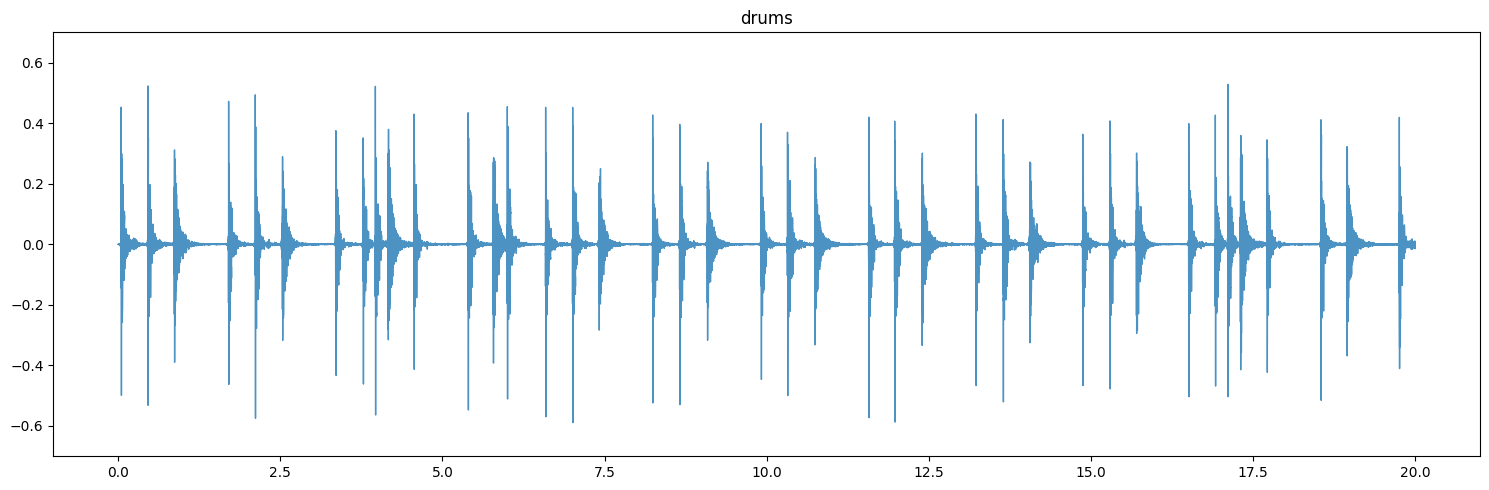

In [9]:
ax = plot_audio(y_drums, sr, lw=1, color='C0', alpha=0.8)
ax.set_title("drums")
ax.set_ylim(-0.7, 0.7)
plt.tight_layout()

plt.savefig("DOCUMENTAION/DIAGRAMS/demucs_1_drums.png", facecolor="white")
plt.show()

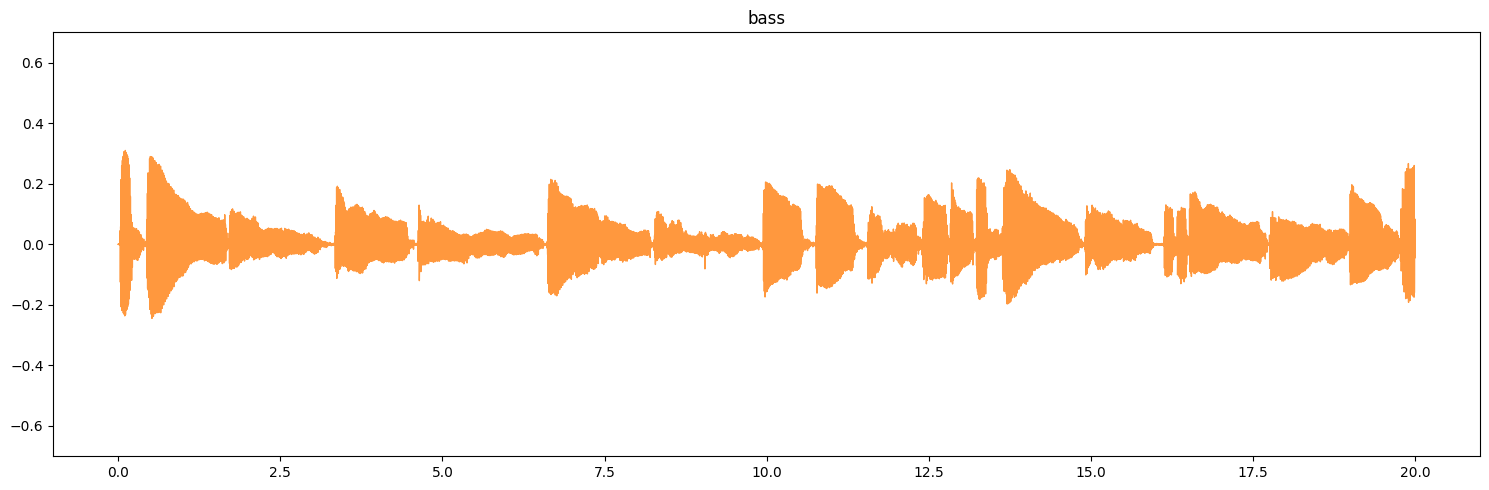

In [10]:
ax = plot_audio(y_bass, sr, lw=1, color='C1', alpha=0.8)
ax.set_title("bass")
ax.set_ylim(-0.7, 0.7)
plt.tight_layout()

plt.savefig("DOCUMENTAION/DIAGRAMS/demucs_2_bass.png", facecolor="white")
plt.show()

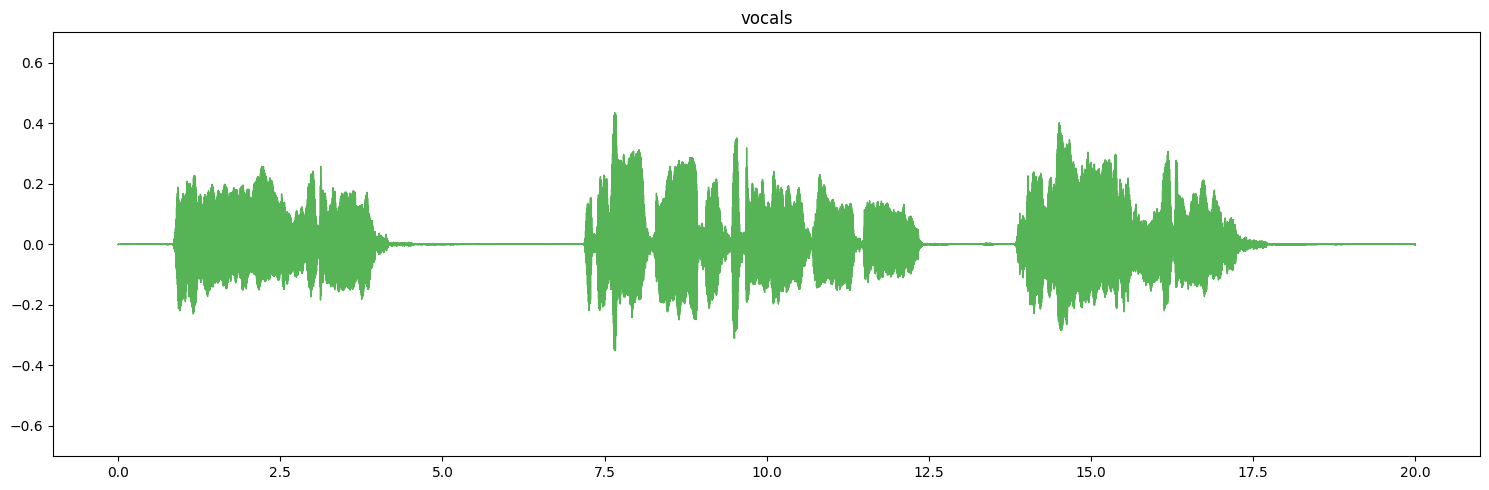

In [11]:
ax = plot_audio(y_vocals, sr, lw=1, color='C2', alpha=0.8)
ax.set_title("vocals")
ax.set_ylim(-0.7, 0.7)
plt.tight_layout()

plt.savefig("DOCUMENTAION/DIAGRAMS/demucs_3_vocals.png", facecolor="white")
plt.show()

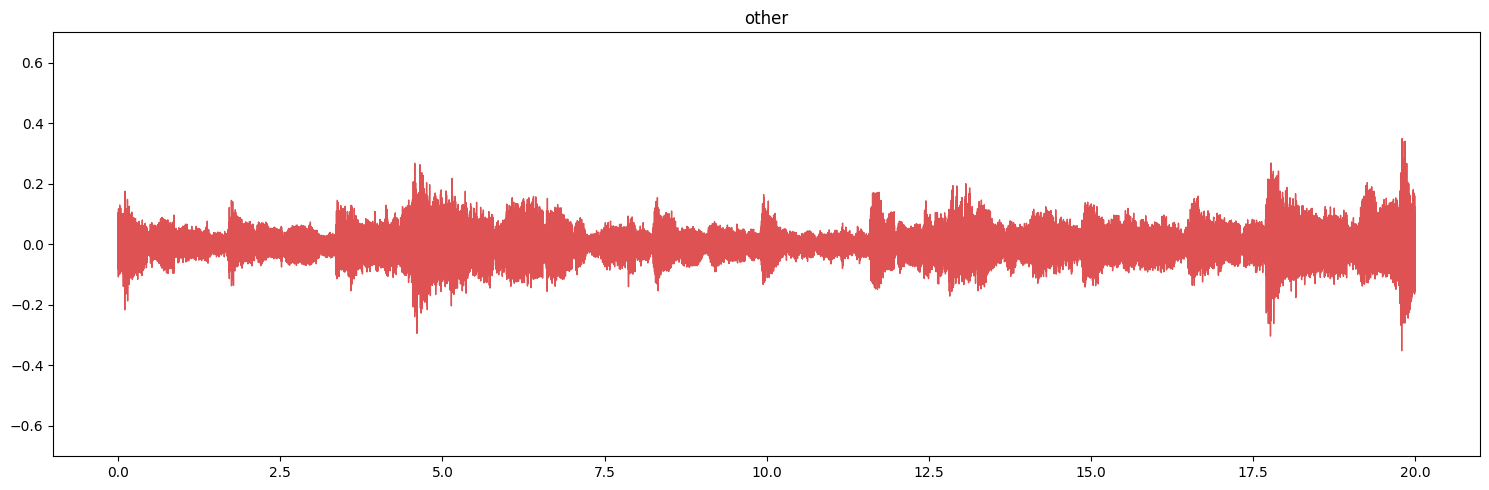

In [12]:
ax = plot_audio(y_other, sr, lw=1, color='C3', alpha=0.8)
ax.set_title("other")
ax.set_ylim(-0.7, 0.7)
plt.tight_layout()

plt.savefig("DOCUMENTAION/DIAGRAMS/demucs_4_other.png", facecolor="white")
plt.show()

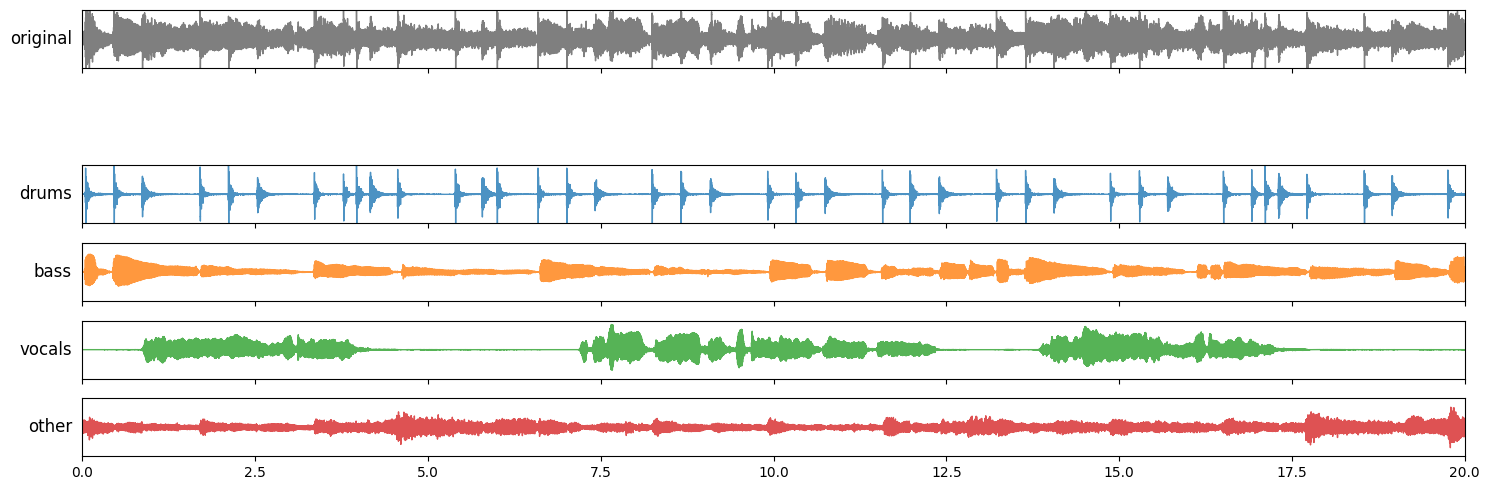

In [33]:
fig, axes = plt.subplots(6, sharex=True)
plot_audio(y, sr, lw=1, c='black', alpha=0.5, ax=axes[0])
plot_audio(y_drums, sr, lw=1, color='C0', alpha=0.8, ax=axes[2])
plot_audio(y_bass, sr, lw=1, color='C1', alpha=0.8, ax=axes[3])
plot_audio(y_vocals, sr, lw=1, color='C2', alpha=0.8, ax=axes[4])
plot_audio(y_other, sr, lw=1, color='C3', alpha=0.8, ax=axes[5])

for ax, name in zip(axes, ["original", "", "drums", "bass", "vocals", "other"]):
    ax.set_ylim(-0.5, 0.5)
    ax.set_yticks([])
    ax.set_ylabel(name, rotation="horizontal", ha="right", va="center", fontsize="larger")

axes[0].set_xlim(0, 20.0)
# axes[-1].set_xlabel("time")
axes[1].set_visible(False)
plt.tight_layout()
plt.savefig("DOCUMENTAION/DIAGRAMS/demucs.png", facecolor="white")
plt.show()

### Spectrogram 

In [58]:
S = librosa.stft(y=y, n_fft=4096, win_length=4096, hop_length=512)
D = librosa.amplitude_to_db(np.abs(S), ref=np.max)

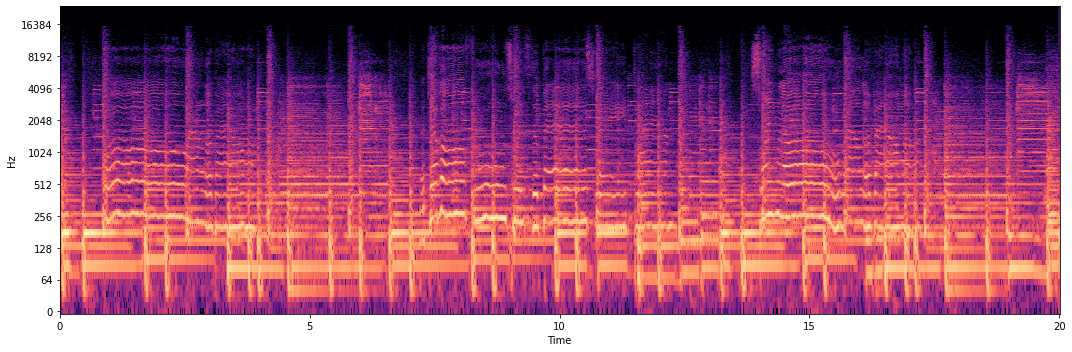

In [60]:
librosa.display.specshow(D, x_axis="time", y_axis="log", n_fft=4096, win_length=4096, hop_length=512, sr=sr)
plt.tight_layout()
plt.savefig("DOCUMENTAION/DIAGRAMS/spectrogram.png", facecolor='white')
plt.show()

### Swing Measurment 

In [74]:
from scipy.signal import find_peaks

In [101]:
hop_length = 512

In [147]:
src = "jazz_beat"
y, sr = librosa.load(f"PROCESSED/{src}/source.wav", sr=None)
rms = librosa.feature.rms(y=y, hop_length=hop_length)[0]
with open(os.path.join(f"./PROCESSED/{src}", 'downbeats.pkl'), 'rb') as f:
    db = pkl.load(f)
beats = []
for i in range(len(db) - 1):
    beats.extend(np.linspace(db[i], db[i+1], 4, endpoint=False))
beats = np.array(beats)

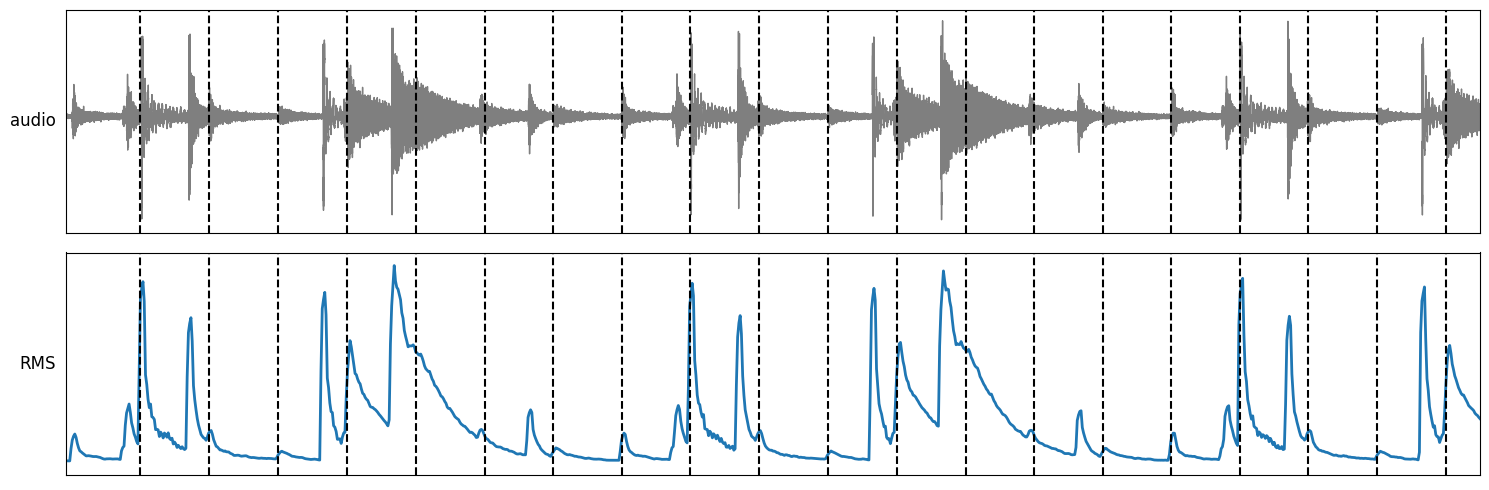

In [151]:
fig, axes = plt.subplots(2, sharex=True)
plot_audio(y, sr, ax=axes[0], color="black", alpha=0.5, lw=1)
tf = librosa.times_like(rms, sr=sr, hop_length=hop_length)
axes[1].plot(tf, rms, color='C0', lw='2')
for d in beats:
    axes[0].axvline(d, color='k', ls='--')
    axes[1].axvline(d, color='k', ls='--')
axes[1].set_xlim(2, 15)

axes[0].set_yticks([])
axes[1].set_yticks([])
axes[1].set_xticks([])

axes[0].set_ylabel("audio", ha="right", va="center", rotation="horizontal", fontsize="larger")
axes[1].set_ylabel("RMS", ha="right", va="center", rotation="horizontal", fontsize="larger")

plt.tight_layout()
plt.savefig("DOCUMENTAION/DIAGRAMS/rms.png")
plt.show()

In [149]:
beats_rms = []
beats_frames = librosa.time_to_frames(beats, sr=sr, hop_length=hop_length)
for start, end in zip(beats_frames[:-1], beats_frames[1:]):
    beats_rms.append(rms[start:end])
length = min(map(len, beats_rms))
beat_energy = np.mean(
    np.stack(
        [b[:length] for b in beats_rms]
    ),
    axis=0
)
peaks, _ = find_peaks(beat_energy, height=0.03, prominence=0.01)
swing = round((peaks[1] - peaks[0]) / len(beat_energy), 2)

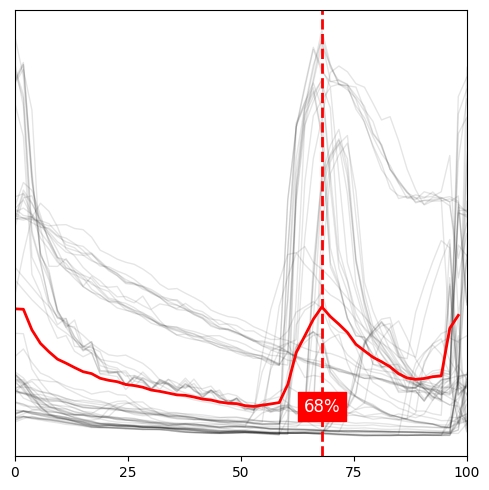

In [150]:
fig, ax = plt.subplots(figsize=(5, 5))
for brms in beats_rms:
    ax.plot(np.roll(brms, -peaks[0]), alpha=0.1, c='k', lw=1)
    
ax.plot(np.roll(beat_energy, -peaks[0]), c='r', lw=2)
ax.axvline(peaks[1] - peaks[0], lw=2, ls="--", c="r")
ax.text(
    swing, 
    0.1, 
    f'{swing*100:.0f}%', 
    ha="center", 
    fontsize="larger", 
    color="white", 
    backgroundcolor="r",
    transform=ax.transAxes,
)

ax.set_xticks(np.linspace(0, len(beat_energy), 5))
ax.set_xticklabels(np.linspace(0, 100, 5, dtype=int))
ax.set_yticks([])
ax.set_xlim(0, len(beat_energy))

plt.tight_layout()
plt.savefig(f"DOCUMENTAION/DIAGRAMS/swing_{src}.png", facecolor='white')
plt.show()